In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.array([1,2,3,4,5,6])
y = np.array([5,4,6,5,6,7])

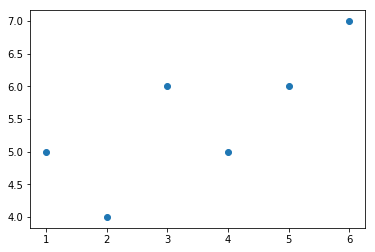

In [3]:
plt.scatter(x, y)
plt.show()

In [5]:
def fit(x, y):
    m_num = ((x * y).mean() - x.mean() * y.mean())
    m_den = (x**2).mean() - (x.mean())**2
    m = m_num/m_den
    
    b = y.mean() - m*x.mean()
    return m, b

In [7]:
def predict(x, m, b):
    return m* x + b

In [10]:
m,b = fit(x, y)
y_p = predict(x, m, b)
y_p
#s = score(y_a, y_p)

array([ 4.42857143,  4.85714286,  5.28571429,  5.71428571,  6.14285714,
        6.57142857])

In [16]:
def cost(x, y, m, b ):
    return ((y - (m*x + b))**2).mean()

In [49]:
def step_gradient(x, y, learning_rate, m, b):
    k = x.shape[0]
    slope_m = 0
    slope_b = 0
    for i in range(k):
        slope_m += (2/k)*x[i]*(m*x[i] + b - y[i])
        slope_b += (2/k)*(m*x[i] + b - y[i])
    m = m - learning_rate * slope_m
    b = b - learning_rate * slope_b
    return m,b

In [ ]:
def stochastic_step_gradient(x, y, learning_rate, m, b):
    k = x.shape[0]
    slope_m = 0
    slope_b = 0
    for i in range(k):
        slope_m = (2/k)*x[i]*(m*x[i] + b - y[i])
        slope_b = (2/k)*(m*x[i] + b - y[i])
        m = m - learning_rate * slope_m
        b = b - learning_rate * slope_b
    return m,b

In [46]:
def gradient_descent(x, y, learning_rate = 0.01, num_iter=1000, initial_m = 0, initial_b=0):
    m = initial_m
    b = initial_b
    print("start: ", cost(x, y, m, b))
    for i in range(num_iter):
        m,b = step_gradient(x,y, learning_rate, m, b)
        if i % 100 == 0:
            print(i, " : ", cost(x, y, m, b), " m = ", m, " b = ", b)
    return m,b

In [45]:
def run(x, y):
    learning_rate = 0.05
    num_iter = 1000
    m, b = gradient_descent(x, y, learning_rate, num_iter)
    return m, b

In [18]:
x.shape[0]

6

In [47]:
m, b = run(x, y)

start:  31.1666666667
0  :  12.9995833333  m =  2.05  b =  0.55
100  :  0.444729584794  m =  0.563044040147  b =  3.42429605707
200  :  0.382555980474  m =  0.449894465596  b =  3.90871184588
300  :  0.380992701494  m =  0.431952577362  b =  3.98552463087
400  :  0.380953394763  m =  0.429107570169  b =  3.9977046714
500  :  0.380952406443  m =  0.428656443408  b =  3.99963603461
600  :  0.380952381593  m =  0.428584909194  b =  3.99994228678
700  :  0.380952380968  m =  0.428573566165  b =  3.99999084854
800  :  0.380952380953  m =  0.428571767525  b =  3.99999854887
900  :  0.380952380952  m =  0.428571482319  b =  3.9999997699


In [38]:
m, b, x, y

(1.0278565019609776,
 1.4343416428868005,
 array([1, 2, 3, 4, 5, 6]),
 array([5, 4, 6, 5, 6, 7]))

In [39]:
m_lr, b_lr = fit(x, y)
m_lr, b_lr

(0.42857142857142866, 4.0)

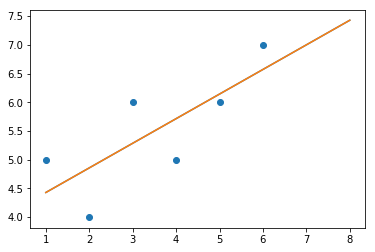

In [48]:
plt.scatter(x, y)
x_t = np.array([1, 4, 8])
y_p = m*x_t + b
y_p_lr = m_lr*x_t + b_lr
plt.plot(x_t, y_p)
plt.plot(x_t, y_p_lr)
plt.show()